<a href="https://colab.research.google.com/github/ncdanh0311/Danh-Data-Projects/blob/main/Liverpool%2023-24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [7]:
from google.colab import files
files.upload()


KeyboardInterrupt: 

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/Liverpool stats.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   player_id   36 non-null     int64 
 1   first_name  36 non-null     object
 2   last_name   36 non-null     object
 3   age         36 non-null     int64 
 4   nation      36 non-null     object
 5   mp          36 non-null     int64 
 6   starts      36 non-null     int64 
 7   Mt          36 non-null     int64 
 8   full_match  36 non-null     int64 
 9   goals       36 non-null     int64 
 10  assist      36 non-null     int64 
 11  pos         36 non-null     object
dtypes: int64(8), object(4)
memory usage: 3.5+ KB


In [10]:
df.head(36)

,player_id,first_name,last_name,age,nation,mp,starts,Mt,full_match,goals,assist,pos
0,1,Allison,Becker,31,BRA,21,21,1890,21,0,0,GK
1,2,Virgil,Van Dijk,32,NED,23,23,2007,22,1,2,DF
2,3,Mohamed,Salah,31,EGY,21,20,1786,20,15,9,FW
3,4,Dominik,Szoboszlai,23,HUN,21,20,1657,18,3,2,MF
4,5,Trent,Alexander-Arnold,25,ENG,21,19,1622,18,2,4,DF
5,6,Luis,Diaz,27,COL,24,19,1568,17,5,3,FW
6,7,Alexis,Mac Allister,25,ARG,20,19,1541,17,2,1,MF
7,8,Darwin,Nunez,24,URU,24,16,1465,16,9,7,FW
8,9,Ibrahima,Konate,24,FRA,18,13,1242,14,0,0,DF
9,10,Diogo,Jota,27,POR,19,13,1047,12,9,3,FW


In [11]:
# Set up the plotting environment
sns.set(style="whitegrid")

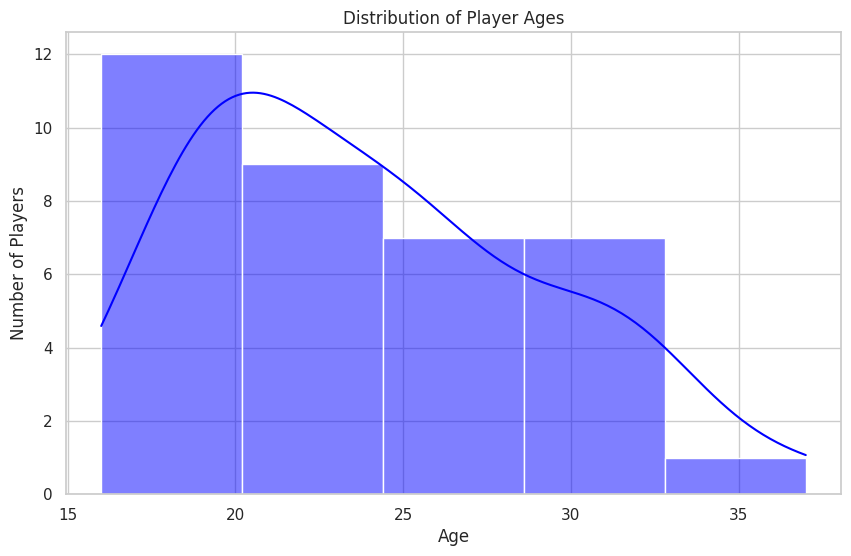

In [12]:
# 1. Distribution of Player Ages
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=5, kde=True, color='blue')
plt.title('Distribution of Player Ages')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.show()

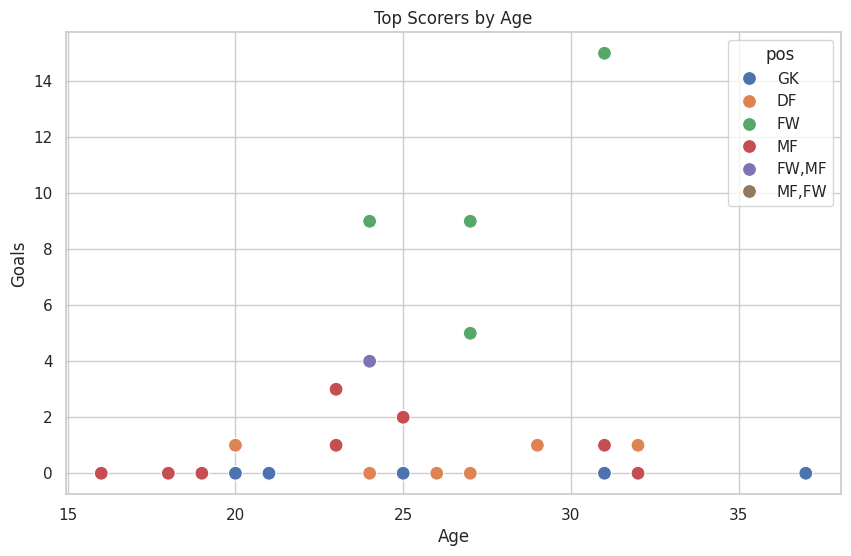

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='goals', data=df, hue='pos', s=100)
plt.title('Top Scorers by Age')
plt.xlabel('Age')
plt.ylabel('Goals')
plt.show()

<Figure size 1000x600 with 0 Axes>

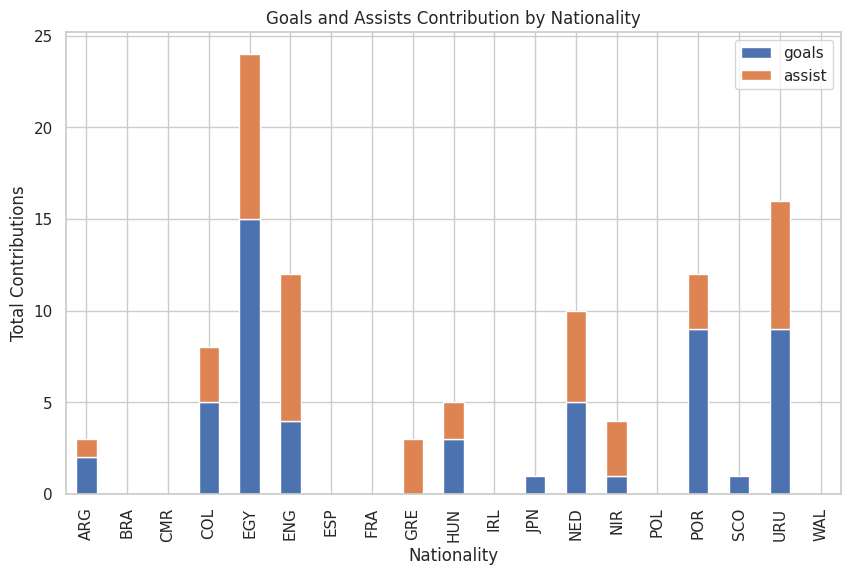

In [14]:
plt.figure(figsize=(10, 6))
df_grouped = df.groupby('nation')[['goals', 'assist']].sum().reset_index()
df_grouped.set_index('nation').plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Goals and Assists Contribution by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Total Contributions')
plt.show()

/tmp/ipython-input-427543691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='last_name', y='total_contribution', data=df, palette='magma')


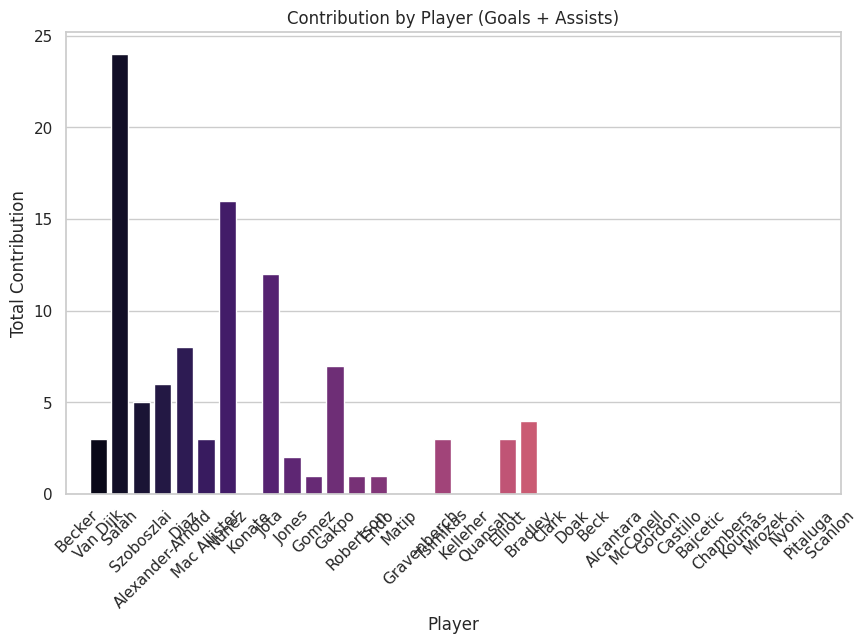

In [15]:
df['total_contribution'] = df['goals'] + df['assist']
plt.figure(figsize=(10, 6))
sns.barplot(x='last_name', y='total_contribution', data=df, palette='magma')
plt.title('Contribution by Player (Goals + Assists)')
plt.xlabel('Player')
plt.ylabel('Total Contribution')
plt.xticks(rotation=45)
plt.show()

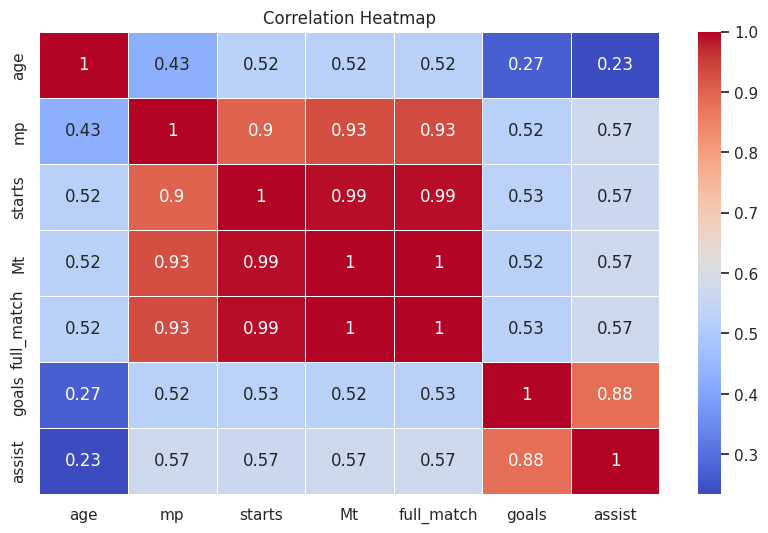

In [17]:
plt.figure(figsize=(10, 6))
corr = df[['age', 'mp', 'starts', 'Mt', 'full_match', 'goals', 'assist']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [13]:
!pip install understat aiohttp nest_asyncio


In [4]:
import nest_asyncio
import asyncio
import pandas as pd
from understat import Understat
import aiohttp

nest_asyncio.apply()  # Giúp chạy asyncio trong notebook


In [11]:
from understat import Understat
import aiohttp
import asyncio
import pandas as pd

async def get_liverpool_players():
    async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        data = await understat.get_team_players("Liverpool", 2023)
        df = pd.DataFrame(data)
        print(df.columns)  # Kiểm tra các cột
        return df[["player_name", "xG", "xA", "goals", "assists"]]

liverpool_df = await get_liverpool_players()
liverpool_df.head(20)


Index(['id', 'player_name', 'games', 'time', 'goals', 'xG', 'assists', 'xA',
       'shots', 'key_passes', 'yellow_cards', 'red_cards', 'position',
       'team_title', 'npg', 'npxG', 'xGChain', 'xGBuildup'],
      dtype='object')


,player_name,xG,xA,goals,assists
0,Mohamed Salah,21.941274393349886,12.332044444978237,18,10
1,Darwin Núñez,19.187851031310856,5.950456521473825,11,8
2,Diogo Jota,6.724682793021202,3.19649357162416,10,3
3,Luis Díaz,12.864595355466008,6.482230054214597,8,5
4,Cody Gakpo,8.769219513982534,4.2288118079304695,8,5
5,Alexis Mac Allister,3.998983211815357,3.578091200441122,5,5
6,Andrew Robertson,2.4325872622430325,6.65541476290673,3,2
7,Trent Alexander-Arnold,2.745258178561926,8.361615665256977,3,4
8,Harvey Elliott,2.5765033923089504,4.262343382462859,3,6
9,Dominik Szoboszlai,3.519060474820435,5.657645266503096,3,2


No charts were generated by quickchart


from matplotlib import pyplot as plt
_df_27['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_28.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_29['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)